#Perceptrón

##Definición

El perceptrón es un algoritmo que aprende una función de clasificación binaria, funcion que mapea una entrada $\mathbf{x}$ que es una vector de valores reales, a un valor de salida $\mathbf{f(x)}$ que es un unico valor binario.

$f(h)= \begin{cases}1 & \text { if } \mathbf{w} \cdot \mathbf{x}+b>0 \\ 0 & \text { otherwise }\end{cases}$

$\mathbf{w}$ es un vector de pesos, valores reales.

 $h = \mathbf{w} \cdot \mathbf{x}$ es el producto punto $\sum_{i=1}^{m} w_{i} x_{i}$, $m$ es el numero de entradas al perceptrón y $b$ es el sesgo.

$f(h)$ permite clasificar $\mathbf{x}$ como una instancia positiva o negativa, para un problema de clasificación binaria. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Conjuntos:
  """
  Esta clase contiene dos grupos diferentes el conjunto A y el conjunto B
  del conjunto A y conjunto B se separa el 70% para entrenamiento 
  y el 30 % para prueba
  """
  def __init__(self):
    pass
  def GrupoA(self):
    self.A=np.array([[1,8],[1,9],[2,10],[2,12],[3,8],[4,7],[4,10],[5,4],[5,9],[6,11],[7,9],[8,11],[8,12],[9,12],[2,7],[3,5],[7,12],[1,10],[3,11],[6,8]]) #Grupo A
    return self.A
  def GrupoB(self): 
    self.B=np.array([[10,8],[11,2],[13,3],[12,3],[12.5,10],[14,4],[14,8],[15,12],[15,6],[16,2],[16,6],[16,9],[18,5],[19,4],[13,2],[15,1],[17,4],[18,3],[19,2],[12,6]]) #Grupo  B
    return self.B 
  def ConjEntrenA(self):    
    self.Ae=self.A[0:14,...] #conjunto de entrenamiento a
    return self.Ae 
  def ConjEntrenB(self):
    self.Be=self.B[0:14,...] #conjunto de entrenamiento b
    return self.Be 
  def ConjPrueA(self):
    self.Ap=self.A[14:20,...] #conjunto de prueba a
    return self.Ap 
  def ConjPrueB(self):   
    self.Bp=self.B[14:20,...] #conjunto de prueba b
    return self.Bp
  def PlotAe(self):
    self.PAe=plt.plot(self.Ae[...,0],self.Ae[...,1], 'o', color='blue')
    d=plt.title('Conjunto de entrenamiento A')
    e=plt.ylabel('caracteristica 2')
    f=plt.xlabel('caracteristica 1')
    g=plt.grid()      
    return self.PAe
  def PlotBe(self):
    self.PBe=plt.plot(self.Be[...,0],self.Be[...,1], 'o', color='red')
    d=plt.title('Conjunto de entrenamiento B')
    e=plt.ylabel('caracteristica 2')
    f=plt.xlabel('caracteristica 1')
    g=plt.grid() 
    return self.PBe
  def PlotAp(self):
    self.PAp=plt.plot(self.Ap[...,0],self.Ap[...,1], 'x', color='blue')
    d=plt.title('Conjunto de prueba A')
    e=plt.ylabel('caracteristica 2')
    f=plt.xlabel('caracteristica 1')
    g=plt.grid()  
    return self.PAp
  def PlotBp(self):
    self.PBp=plt.plot(self.Bp[...,0],self.Bp[...,1], 'x', color='red')
    d=plt.title('Conjunto de prueba B')
    e=plt.ylabel('caracteristica 2')
    f=plt.xlabel('caracteristica 1')
    g=plt.grid()     
    return self.PBp
  def PlotAll(self):    
    self.PAe=plt.plot(self.Ae[...,0],self.Ae[...,1], 'o', color='blue')
    self.PBe=plt.plot(self.Be[...,0],self.Be[...,1], 'o', color='red')
    self.PAp=plt.plot(self.Ap[...,0],self.Ap[...,1], 'x', color='blue')
    self.PBp=plt.plot(self.Bp[...,0],self.Bp[...,1], 'x', color='red')
    d=plt.title('Conjunto Total')
    e=plt.ylabel('caracteristica 2')
    f=plt.xlabel('caracteristica 1')
    g=plt.grid()    
    return self.PAe,self.PBe,self.PAp,self.PBp

In [ ]:
Conjs=Conjuntos()
A=Conjs.GrupoA()
B=Conjs.GrupoB()
Ae=Conjs.ConjEntrenA()
Be=Conjs.ConjEntrenB()
Ap=Conjs.ConjPrueA()
Bp=Conjs.ConjPrueB()

PAe=Conjs.PlotAe
PBe=Conjs.PlotBe
PAp=Conjs.PlotAp
PBp=Conjs.PlotBp
PAll=Conjs.PlotAll


#PAll=Conjs.PlotAll()


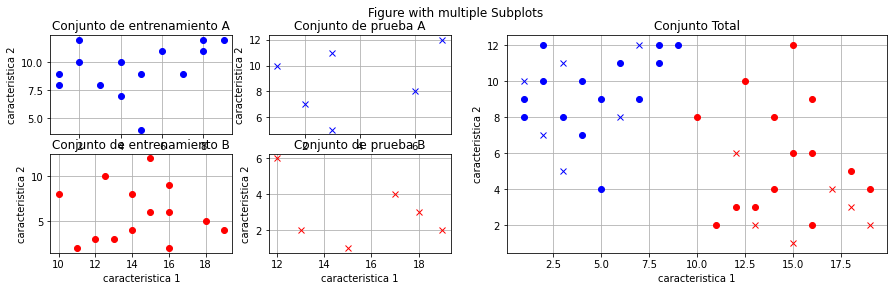

In [ ]:
fig=plt.figure(figsize=(15,4))

ax_1=fig.add_subplot(241)
PAe()

ax_2=fig.add_subplot(245)
PBe()

ax_3=fig.add_subplot(242)
PAp()

ax_4=fig.add_subplot(246)

PBp()

ax_4=fig.add_subplot(122)

PAll()
fig.suptitle("Figure with multiple Subplots")
plt.show()

In [ ]:
class Perceptron:
  """
  f_x  =  y_hat  =   {1   si  x.w  +  b > 0 ; 0 otherwhise
  x : vector de entradas
  w : vector de pesos
  x.w : porducto punto
  b  :  bias
  f_x :salida del perceptron

  interpetación del perceptrón siguiendo los pasos:
  1.Determinar el Forward Pass
  2.Determinar el error respecto a la etiqueta 
  3.Modificar los pesos
  4.Termino de error
  5.Determinar el incremento
  6.Actualizar los pesos 

  """
  def __init__(self, x1,x2,d1):
    self.x1=x1
    self.x2=x2
    self.x=np.array([self.x1,self.x2])

    self.d1 = d1 #Este valor es la etiqueta 
    
    self.r = 0.4 # learning rate
  
  def Pesos(self,w1,w2):
    self.w1=w1
    self.w2=w2
    #self.w1=random.uniform (-1, 1)
    #self.w2=random.uniform (-1, 1)
    self.w=np.array([self.w1,self.w2])
    return self.w1,self.w2

  def SumaPonderada(self):
    h = np.dot(self.x,self.w) #h
    return h  
  #Forward pass:
  def SalidaPerceptron(self):  
    h = np.dot(self.x,self.w) #h
    #f_h =1 / (1 + np.exp(-h)) # sigmoid
    #def step(self, h):
      #return 1 if h > 0 else 0
    f_h= 1 if h > 0 else 0  #f_h  step
    #return step(self, h)
    return f_h
    #Loss  
  def NuevosPesos(self):
    h = np.dot(self.x,self.w) #h o p
    f_h= 1 if h > 0 else 0 #f_h  step
    w1=self.w1 + self.r*(self.d1-f_h)*self.x1
    w2=self.w2 + self.r*(self.d1-f_h)*self.x2
    return w1 , w2

  def Error(self):
    h = np.dot(self.x,self.w) #h
    f_h= 1 if h > 0 else 0  #f_h  step
    #E1 = -1*self.y*np.log(f_h)
    E = (self.d1 - f_h)*(self.d1 - f_h)
    return E 

In [ ]:
Ae.shape

(14, 2)

## Aprendizaje
$r \in (0,1)$ es la tasa de aprendizaje.

$\hat{y}=f(\mathbf{h}) \in $ {$0,1$} es la salida del perceptrón para un vector de entrada.

$perc =\left\{\left(\mathbf{x}_{1}, d_{1}\right), \ldots,\left(\mathbf{x}_{s}, d_{s}\right)\right\}$  es el conjunto de entrenamiento de $s$ muestras:
* $\mathbf{x}_{j}$ es el vector de entrada n-dimensional.
* $d_{j}$ es el valor de salida deseado para esa entrada o etiqueta.

$x_{j, i}$ es el valor de la $i$ característica del $j$ vector de entrada del perceptrón. 

$w_{i}$ es el valor de del peso $i$ en el vector de pesos


Para cada ejemplo j en el conjunto de entrenamiento $conj$ se realizan los siguientes pasos:

* Se calcula la salida 

$\begin{aligned} \hat{y_{j}}(t) &=f\left[\mathbf{w}(t) \cdot \mathbf{x}_{j}\right] \\ &=f\left[w_{0}(t) x_{j, 0}+w_{1}(t) x_{j, 1}+w_{2}(t) x_{j, 2}+\cdots+w_{n}(t) x_{j, n}\right] \end{aligned}$

* Se actualiza los pesos

$w_{i}(t+1)=w_{i}(t)+r \cdot\left(d_{j}-y_{j}(t)\right) x_{j, i}$

In [ ]:
h=[]
w=[]
y_hat=[]
ww=[]
E=[]
www=[]
hhh=[]
yyy_hat=[]
wwwww=[]
EEE=[]
for j in Ae : 
  perc=Perceptron(j[0],j[1],1)
  w=np.append(w,perc.Pesos(np.random.uniform(-0.05, 0.05),np.random.uniform(-0.05, 0.05)))
  #w=np.append(w,perc.Pesos(0.5,-0.5))
  h=np.append(h,perc.SumaPonderada())
  y_hat=np.append(y_hat,perc.SalidaPerceptron())
  ww=np.append(ww,perc.NuevosPesos())
  E=np.append(E,perc.Error())
  www=np.append(www,perc.Pesos(perc.NuevosPesos()[0],perc.NuevosPesos()[1]))
  hhh=np.append(hhh,perc.SumaPonderada())
  yyy_hat=np.append(yyy_hat,perc.SalidaPerceptron())
  wwwww=np.append(wwwww,perc.NuevosPesos())
  EEE=np.append(EEE,perc.Error())

for j in Be : 
  perc=Perceptron(j[0],j[1],0)
  w=np.append(w,perc.Pesos(np.random.uniform(-0.05, 0.05),np.random.uniform(-0.05, 0.05)))
  #w=np.append(w,perc.Pesos(0.5,-0.5))
  h=np.append(h,perc.SumaPonderada())
  y_hat=np.append(y_hat,perc.SalidaPerceptron())
  ww=np.append(ww,perc.NuevosPesos())
  E=np.append(E,perc.Error())
  www=np.append(www,perc.Pesos(perc.NuevosPesos()[0],perc.NuevosPesos()[1]))
  hhh=np.append(hhh,perc.SumaPonderada())
  yyy_hat=np.append(yyy_hat,perc.SalidaPerceptron())
  wwwww=np.append(wwwww,perc.NuevosPesos())
  EEE=np.append(EEE,perc.Error())

In [ ]:
w.shape=(28,2)
w # pesos iniciales para cada una de las muestras 

array([[ 0.03131977, -0.04786995],
       [-0.00193971,  0.00429657],
       [ 0.0441988 ,  0.02642285],
       [ 0.03537855, -0.03217294],
       [-0.00703493, -0.01211585],
       [-0.03313597,  0.02930962],
       [ 0.02708679,  0.02692674],
       [ 0.01308643, -0.03345245],
       [-0.01854532, -0.04790936],
       [-0.04485483, -0.00227378],
       [-0.04977002,  0.02955467],
       [-0.00758557,  0.01522609],
       [ 0.018263  ,  0.01553558],
       [-0.02737769,  0.0051428 ],
       [ 0.04381928,  0.01770458],
       [ 0.02579257,  0.04937542],
       [-0.01978777, -0.03545939],
       [-0.03529792, -0.04968449],
       [ 0.04599271,  0.00301203],
       [-0.02945157,  0.02595529],
       [-0.02092118, -0.005441  ],
       [-0.00711564, -0.02817953],
       [-0.01195631,  0.04475673],
       [-0.0340858 , -0.02609519],
       [-0.03302332,  0.01681493],
       [-0.04610642, -0.04013444],
       [ 0.01612076,  0.01319864],
       [ 0.01435199,  0.04861314]])

In [ ]:
h # suma ponderada de las caracteristicas de cad una de las entradas con sus respectivos pesos iniciales

array([-0.35163981,  0.03672946,  0.35262605, -0.31531813, -0.11803157,
        0.07262346,  0.37761453, -0.06837767, -0.52391078, -0.29414063,
       -0.08239811,  0.10680245,  0.33253093, -0.18468565,  0.57982941,
        0.38246915, -0.36361921, -0.57262848,  0.60502921, -0.30850085,
       -0.33642455, -0.44488899,  0.08919565, -0.59756319, -0.42748355,
       -1.09891268,  0.35616678,  0.46714037])

In [ ]:
y_hat # Salida del perceptro pra cada una de las muestras 

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.])

In [ ]:
ww.shape = (28,2)
ww #nuevos pesos

array([[ 4.31319767e-01,  3.15213005e+00],
       [-1.93970692e-03,  4.29657362e-03],
       [ 4.41987973e-02,  2.64228451e-02],
       [ 8.35378545e-01,  4.76782706e+00],
       [ 1.19296507e+00,  3.18788415e+00],
       [-3.31359697e-02,  2.93096198e-02],
       [ 2.70867928e-02,  2.69267355e-02],
       [ 2.01308643e+00,  1.56654755e+00],
       [ 1.98145468e+00,  3.55209064e+00],
       [ 2.35514517e+00,  4.39772622e+00],
       [ 2.75022998e+00,  3.62955467e+00],
       [-7.58557404e-03,  1.52260948e-02],
       [ 1.82630016e-02,  1.55355768e-02],
       [ 3.57262231e+00,  4.80514280e+00],
       [-3.95618072e+00, -3.18229542e+00],
       [-4.37420743e+00, -7.50624580e-01],
       [-1.97877722e-02, -3.54593896e-02],
       [-3.52979180e-02, -4.96844892e-02],
       [-4.95400729e+00, -3.99698797e+00],
       [-2.94515706e-02,  2.59552859e-02],
       [-2.09211793e-02, -5.44100489e-03],
       [-7.11563899e-03, -2.81795338e-02],
       [-6.01195631e+00, -2.35524327e+00],
       [-3.

In [ ]:
E # error de la salida del perceptron contra el valor deseado

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.])

In [ ]:
hhh # nuevas sumas ponderadas

array([ 2.56483602e+01,  3.67294556e-02,  3.52626046e-01,  5.88846819e+01,
        2.90819684e+01,  7.26234601e-02,  3.77614526e-01,  1.63316223e+01,
        4.18760892e+01,  6.25058594e+01,  5.19176019e+01,  1.06802450e-01,
        3.32530935e-01,  8.98153143e+01, -6.50201706e+01, -4.96175309e+01,
       -3.63619207e-01, -5.72628483e-01, -1.01894971e+02, -3.08500845e-01,
       -3.36424549e-01, -4.44888990e-01, -1.04310804e+02, -5.97563189e-01,
       -4.27483546e-01, -1.09891268e+00, -1.39243833e+02, -1.50332860e+02])

In [ ]:
yyy_hat # nuevas salidas 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
EEE # Nuevo error de la salida del perceptron respecto el valor deseado

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
x=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [ ]:
wwc1=ww[...,0]
wwc11=wwc1[0:14]
wwc12=wwc1[14:28]

In [ ]:
np.mean(wwc11)

1.084220664125387

In [ ]:
wwc12

array([-3.95618072e+00, -4.37420743e+00, -1.97877722e-02, -3.52979180e-02,
       -4.95400729e+00, -2.94515706e-02, -2.09211793e-02, -7.11563899e-03,
       -6.01195631e+00, -3.40858001e-02, -3.30233222e-02, -4.61064193e-02,
       -7.18387924e+00, -7.58564801e+00])

In [ ]:
np.mean(wwc12)


-2.449404901739441

In [ ]:
zz=[]
for i in range (0,14,1):
  zz=np.append(zz,(wwc11[i],wwc12[i]))
zz

array([ 4.31319767e-01, -3.95618072e+00, -1.93970692e-03, -4.37420743e+00,
        4.41987973e-02, -1.97877722e-02,  8.35378545e-01, -3.52979180e-02,
        1.19296507e+00, -4.95400729e+00, -3.31359697e-02, -2.94515706e-02,
        2.70867928e-02, -2.09211793e-02,  2.01308643e+00, -7.11563899e-03,
        1.98145468e+00, -6.01195631e+00,  2.35514517e+00, -3.40858001e-02,
        2.75022998e+00, -3.30233222e-02, -7.58557404e-03, -4.61064193e-02,
        1.82630016e-02, -7.18387924e+00,  3.57262231e+00, -7.58564801e+00])

In [ ]:
wwc2=ww[...,1]
wwc21=wwc2[0:14]
wwc21
wwc22=wwc2[14:28]
wwc22

array([-3.18229542, -0.75062458, -0.03545939, -0.04968449, -3.99698797,
        0.02595529, -0.005441  , -0.02817953, -2.35524327, -0.02609519,
        0.01681493, -0.04013444, -1.98680136, -1.55138686])

In [ ]:

for i in range (0,14,1):
  zz=np.append(zz,(wwc11[i],wwc12[i]))
zz

array([ 4.31319767e-01, -3.95618072e+00, -1.93970692e-03, -4.37420743e+00,
        4.41987973e-02, -1.97877722e-02,  8.35378545e-01, -3.52979180e-02,
        1.19296507e+00, -4.95400729e+00, -3.31359697e-02, -2.94515706e-02,
        2.70867928e-02, -2.09211793e-02,  2.01308643e+00, -7.11563899e-03,
        1.98145468e+00, -6.01195631e+00,  2.35514517e+00, -3.40858001e-02,
        2.75022998e+00, -3.30233222e-02, -7.58557404e-03, -4.61064193e-02,
        1.82630016e-02, -7.18387924e+00,  3.57262231e+00, -7.58564801e+00,
        4.31319767e-01, -3.95618072e+00, -1.93970692e-03, -4.37420743e+00,
        4.41987973e-02, -1.97877722e-02,  8.35378545e-01, -3.52979180e-02,
        1.19296507e+00, -4.95400729e+00, -3.31359697e-02, -2.94515706e-02,
        2.70867928e-02, -2.09211793e-02,  2.01308643e+00, -7.11563899e-03,
        1.98145468e+00, -6.01195631e+00,  2.35514517e+00, -3.40858001e-02,
        2.75022998e+00, -3.30233222e-02, -7.58557404e-03, -4.61064193e-02,
        1.82630016e-02, -

In [ ]:
np.mean(wwc21)

2.0840443275697296

In [ ]:
np.mean(wwc22)

-0.9975402356428299

In [ ]:
zz.shape=(28,2)


In [ ]:
zz.shape

(28, 2)

In [ ]:
zz

array([[ 4.31319767e-01, -3.95618072e+00],
       [-1.93970692e-03, -4.37420743e+00],
       [ 4.41987973e-02, -1.97877722e-02],
       [ 8.35378545e-01, -3.52979180e-02],
       [ 1.19296507e+00, -4.95400729e+00],
       [-3.31359697e-02, -2.94515706e-02],
       [ 2.70867928e-02, -2.09211793e-02],
       [ 2.01308643e+00, -7.11563899e-03],
       [ 1.98145468e+00, -6.01195631e+00],
       [ 2.35514517e+00, -3.40858001e-02],
       [ 2.75022998e+00, -3.30233222e-02],
       [-7.58557404e-03, -4.61064193e-02],
       [ 1.82630016e-02, -7.18387924e+00],
       [ 3.57262231e+00, -7.58564801e+00],
       [ 4.31319767e-01, -3.95618072e+00],
       [-1.93970692e-03, -4.37420743e+00],
       [ 4.41987973e-02, -1.97877722e-02],
       [ 8.35378545e-01, -3.52979180e-02],
       [ 1.19296507e+00, -4.95400729e+00],
       [-3.31359697e-02, -2.94515706e-02],
       [ 2.70867928e-02, -2.09211793e-02],
       [ 2.01308643e+00, -7.11563899e-03],
       [ 1.98145468e+00, -6.01195631e+00],
       [ 2.

In [ ]:
y=[]
for i in zz:
  y=np.append(y,(i[0]*x+i[1]))   #Ecuación de la recta
y.shape=(28,20)



yyy=np.mean(zz[...,0])
yyyy=np.mean(zz[...,1])
yyy,yyyy

(1.0842206641253873, -2.449404901739441)

In [ ]:
Bp

array([[13.,  2.],
       [15.,  1.],
       [17.,  4.],
       [18.,  3.],
       [19.,  2.],
       [12.,  6.]])

In [ ]:
Ap.shape

(6, 2)

In [ ]:
zz

array([[ 4.31319767e-01, -3.95618072e+00],
       [-1.93970692e-03, -4.37420743e+00],
       [ 4.41987973e-02, -1.97877722e-02],
       [ 8.35378545e-01, -3.52979180e-02],
       [ 1.19296507e+00, -4.95400729e+00],
       [-3.31359697e-02, -2.94515706e-02],
       [ 2.70867928e-02, -2.09211793e-02],
       [ 2.01308643e+00, -7.11563899e-03],
       [ 1.98145468e+00, -6.01195631e+00],
       [ 2.35514517e+00, -3.40858001e-02],
       [ 2.75022998e+00, -3.30233222e-02],
       [-7.58557404e-03, -4.61064193e-02],
       [ 1.82630016e-02, -7.18387924e+00],
       [ 3.57262231e+00, -7.58564801e+00],
       [ 4.31319767e-01, -3.95618072e+00],
       [-1.93970692e-03, -4.37420743e+00],
       [ 4.41987973e-02, -1.97877722e-02],
       [ 8.35378545e-01, -3.52979180e-02],
       [ 1.19296507e+00, -4.95400729e+00],
       [-3.31359697e-02, -2.94515706e-02],
       [ 2.70867928e-02, -2.09211793e-02],
       [ 2.01308643e+00, -7.11563899e-03],
       [ 1.98145468e+00, -6.01195631e+00],
       [ 2.

([<matplotlib.lines.Line2D at 0x7f3ab5f26290>],
 [<matplotlib.lines.Line2D at 0x7f3ab5959d90>])

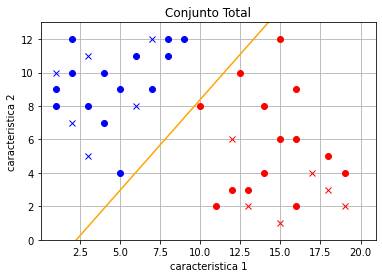

In [ ]:
plt.plot(x,yyy*x+yyyy, color='orange')
plt.ylim((0,13))
PAll()

In [ ]:
h=[]
w=[]
y_hat=[]

for j in Ap : 
  for i in ww : 
    perc=Perceptron(j[0],j[1],1) #en este caso la etiqueta no se tendra en cuenta 
    #w=np.append(w,perc.Pesos(np.random.uniform(-1, 1),np.random.uniform(-1, 1)))
    w=np.append(w,perc.Pesos(i[0],i[1]))
    h=np.append(h,perc.SumaPonderada())
    y_hat=np.append(y_hat,perc.SalidaPerceptron())


for j in Bp : 
  for i in ww : 
    perc=Perceptron(j[0],j[1],0) #en este paso la etiqueta no se tendra en cuenta 
    #w=np.append(w,perc.Pesos(np.random.uniform(-1, 1),np.random.uniform(-1, 1)))
    w=np.append(w,perc.Pesos(i[0],i[1]))
    h=np.append(h,perc.SumaPonderada())
    y_hat=np.append(y_hat,perc.SalidaPerceptron())

y_hat.shape=(12,28)
mean =[]
for i in y_hat :
  mean=np.append(mean,np.mean(i))
mean.shape=(12,1)
mean

array([[0.57142857],
       [0.53571429],
       [0.53571429],
       [0.57142857],
       [0.57142857],
       [0.53571429],
       [0.39285714],
       [0.39285714],
       [0.39285714],
       [0.39285714],
       [0.39285714],
       [0.46428571]])

In [ ]:
y_hat=y_hat.astype(int)

In [ ]:
y_hat[0].shape

(28,)

In [ ]:
y_pred=[]

for i in range (0,12,1):
  y_pred=np.append(y_pred,np.bincount(y_hat[i]).argmax())

y_pred # son las predicciones para el conjunto de prueba completo

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])